In [28]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df = pd.read_csv('amazon.csv',encoding="iso-8859-1",parse_dates=['date'])

In [4]:
df.head()

year state    month  number       date
0  1998  Acre  Janeiro     0.0 1998-01-01
1  1999  Acre  Janeiro     0.0 1999-01-01
2  2000  Acre  Janeiro     0.0 2000-01-01
3  2001  Acre  Janeiro     0.0 2001-01-01
4  2002  Acre  Janeiro     0.0 2002-01-01

In [8]:
df.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [9]:
df.shape

(6454, 5)

In [10]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [16]:
df.duplicated().any()

True

In [17]:
df.drop_duplicates(inplace=True)

In [20]:
df.describe()

year       number                           date
count  6422.000000  6422.000000                           6422
mean   2007.490969   108.815178  2007-06-29 10:46:40.622859008
min    1998.000000     0.000000            1998-01-01 00:00:00
25%    2003.000000     3.000000            2003-01-01 00:00:00
50%    2007.000000    24.497000            2007-01-01 00:00:00
75%    2012.000000   114.000000            2012-01-01 00:00:00
max    2017.000000   998.000000            2017-01-01 00:00:00
std       5.731806   191.142482                            NaN

In [21]:
df.head()

year state    month  number       date
0  1998  Acre  Janeiro     0.0 1998-01-01
1  1999  Acre  Janeiro     0.0 1999-01-01
2  2000  Acre  Janeiro     0.0 2000-01-01
3  2001  Acre  Janeiro     0.0 2001-01-01
4  2002  Acre  Janeiro     0.0 2002-01-01

In [22]:
df['month']=df['month'].map({
                            'Janeiro':'jan',
                            'Fevereiro':'feb',
                            'Março':'march',
                            'Abril':'april',                                
                            'Maio':'may',
                            'Junho':'jun',
                            'Julho':'july',
                            'Agosto':'august',
                            'Setembro':'sep',
                            'Outubro':'oct',
                            'Novembro':'nov',
                            'Dezembro':'dec'
                                   })

In [23]:
df.head()

year state month  number       date
0  1998  Acre   jan     0.0 1998-01-01
1  1999  Acre   jan     0.0 1999-01-01
2  2000  Acre   jan     0.0 2000-01-01
3  2001  Acre   jan     0.0 2001-01-01
4  2002  Acre   jan     0.0 2002-01-01

<Axes: xlabel='month', ylabel='number'>

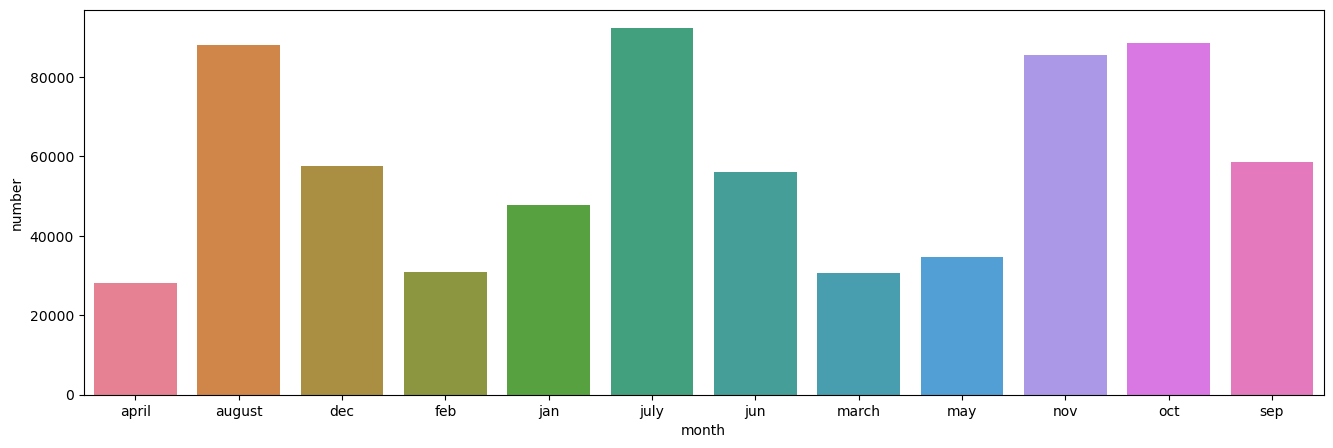

In [29]:
month_max_fire = df.groupby('month')['number'].sum().reset_index()
plt.figure(figsize=(16,5))
sns.barplot(x='month',y='number', data=month_max_fire, hue='month')

**From the barplot we can see that the month of August, July, November and October recorded maximum fire**

Text(0.5, 1.0, 'Year Maximum Number of Forest Fires Were Reported')

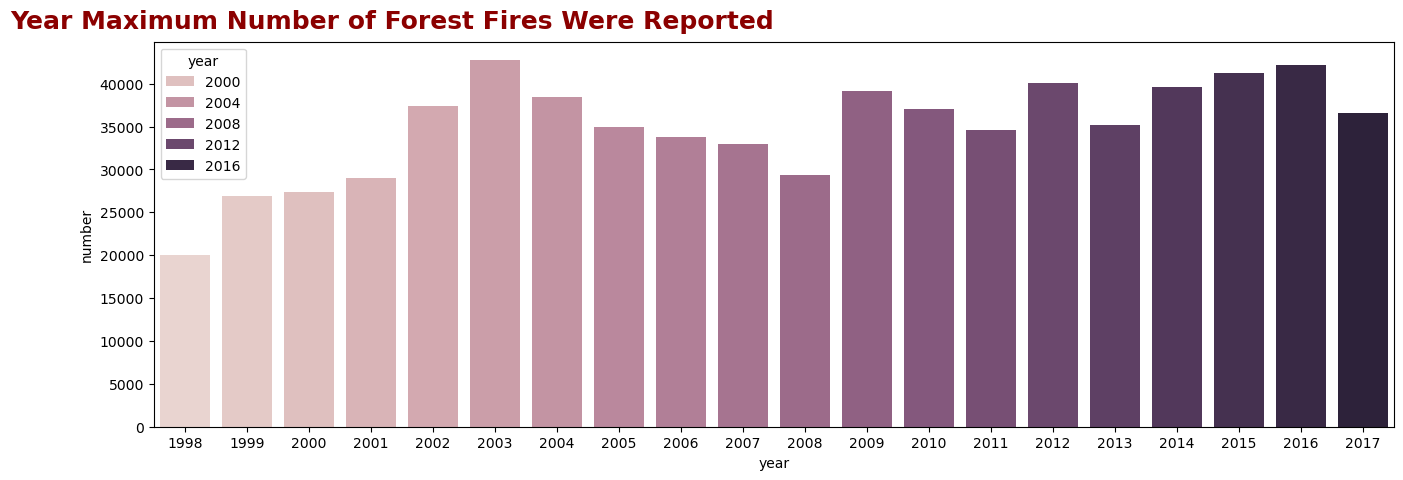

In [36]:
year_max_fire=df.groupby('year')['number'].sum().reset_index()
plt.figure(figsize=(16,5))

font = {
    'fontsize': 18,  # Random font size
    'fontweight': 'bold',  # Random font weight
    'color': 'darkred',  # Random color
    'verticalalignment': 'bottom',  # Random vertical alignment
    'horizontalalignment': 'right',  # Random horizontal alignment
}

sns.barplot(x='year', y='number', data=year_max_fire,hue='year')
plt.title('Year Maximum Number of Forest Fires Were Reported',fontdict=font)

Text(0.5, 1.0, 'State were Maximum Number of Forest Fires Were Reported')

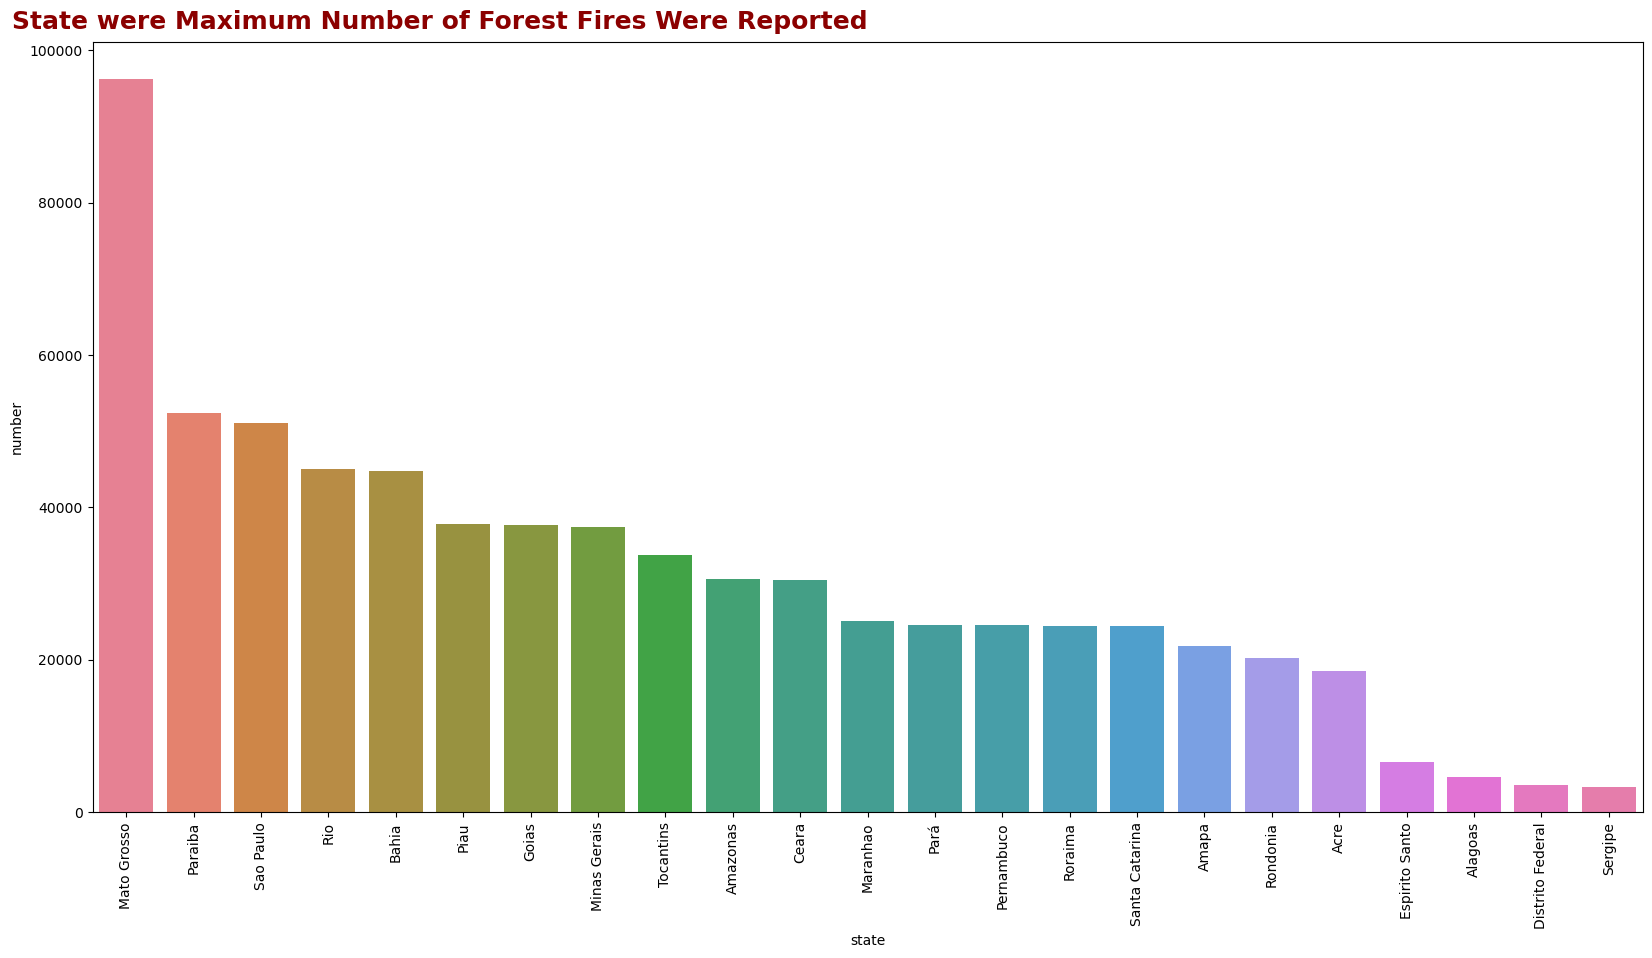

In [51]:
state_max_fire=df.groupby('state')['number'].sum().reset_index().sort_values(by='number', ascending=False)
plt.figure(figsize=(20,10))

font = {
    'fontsize': 18,  # Random font size
    'fontweight': 'bold',  # Random font weight
    'color': 'darkred',  # Random color
    'verticalalignment': 'bottom',  # Random vertical alignment
    'horizontalalignment': 'right',  # Random horizontal alignment
}

sns.barplot(x='state', y='number', data=state_max_fire,hue='state')
plt.xticks(rotation=90)
plt.title('State were Maximum Number of Forest Fires Were Reported',fontdict=font)

In [54]:
df[df['state']=='Amazonas']['number'].sum()

30650.129

In [111]:
df_date = df[df['state']=='Amazonas']
df_date.groupby('year')['number'].sum().reset_index()

year    number
0   1998   946.000
1   1999  1061.000
2   2000   853.000
3   2001  1297.000
4   2002  2852.000
5   2003  1524.268
6   2004  2298.207
7   2005  1657.128
8   2006   997.640
9   2007   589.601
10  2008  2717.000
11  2009  1320.601
12  2010  2324.508
13  2011  1652.538
14  2012  1110.641
15  2013   905.217
16  2014  2385.909
17  2015  1189.994
18  2016  2060.972
19  2017   906.905

Text(0.5, 1.0, 'Number of Fires Were Reported In Amazonas (Year-Wise)')

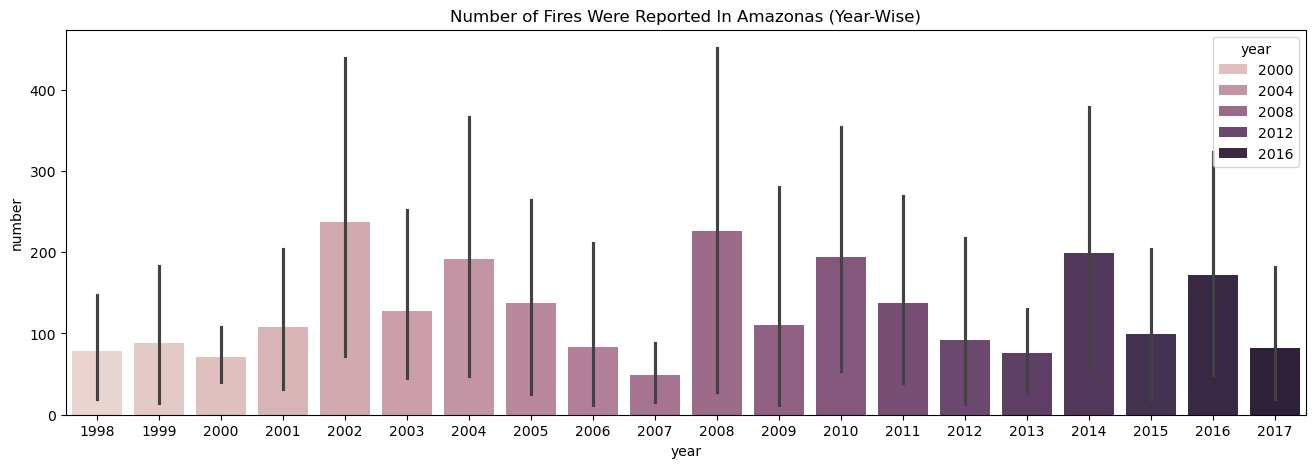

In [112]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number', data=df_date,hue = 'year')
plt.title('Number of Fires Were Reported In Amazonas (Year-Wise)')

In [59]:
df.head()

year state month  number       date
0  1998  Acre   jan     0.0 1998-01-01
1  1999  Acre   jan     0.0 1999-01-01
2  2000  Acre   jan     0.0 2000-01-01
3  2001  Acre   jan     0.0 2001-01-01
4  2002  Acre   jan     0.0 2002-01-01

In [60]:
df.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [107]:
data=df[df['state']=='Amazonas']

In [108]:
day = data.groupby(data["date"].dt.dayofweek)['number'].sum()
import calendar

day.index=[calendar.day_name[x] for x in range(0,7)]
day = day.reset_index()

In [109]:
day

index    number
0     Monday  1886.601
1    Tuesday  6474.217
2  Wednesday  3910.177
3   Thursday  5754.802
4     Friday  5446.480
5   Saturday  4162.666
6     Sunday  3015.186

Text(0.5, 1.0, 'Number of Fires Were Reported In Amazonas (Day-Wise)')

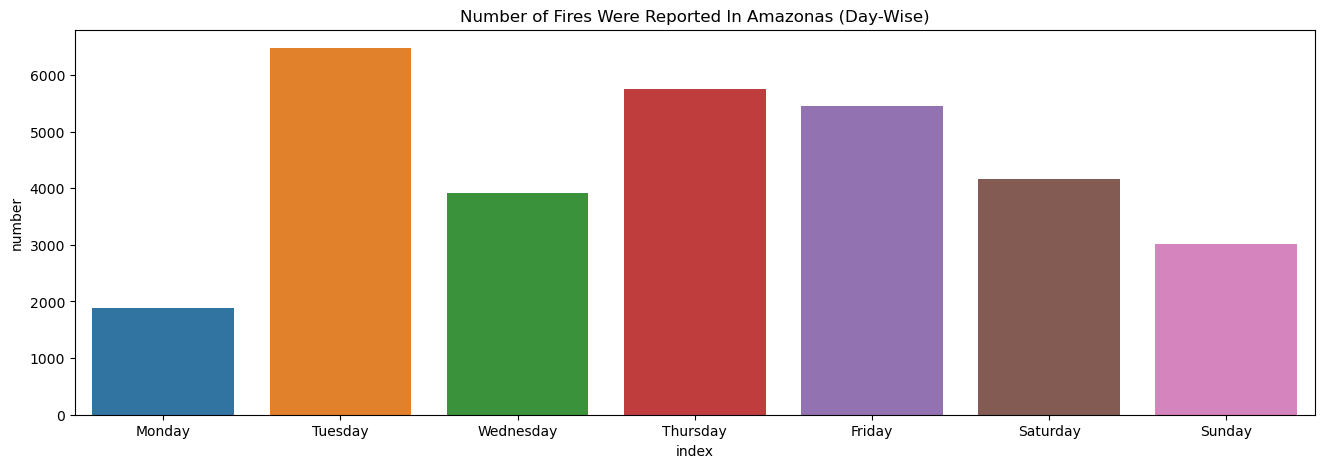

In [110]:
plt.figure(figsize=(16,5))
sns.barplot(x='index', y='number', data=day, hue = 'index')
plt.title('Number of Fires Were Reported In Amazonas (Day-Wise)')

In [88]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [105]:
data = df[df['year']==2015].groupby('month')['number'].sum().reset_index()

Text(0.5, 1.0, 'Total Number of Fires Were Reported in each month of 2015')

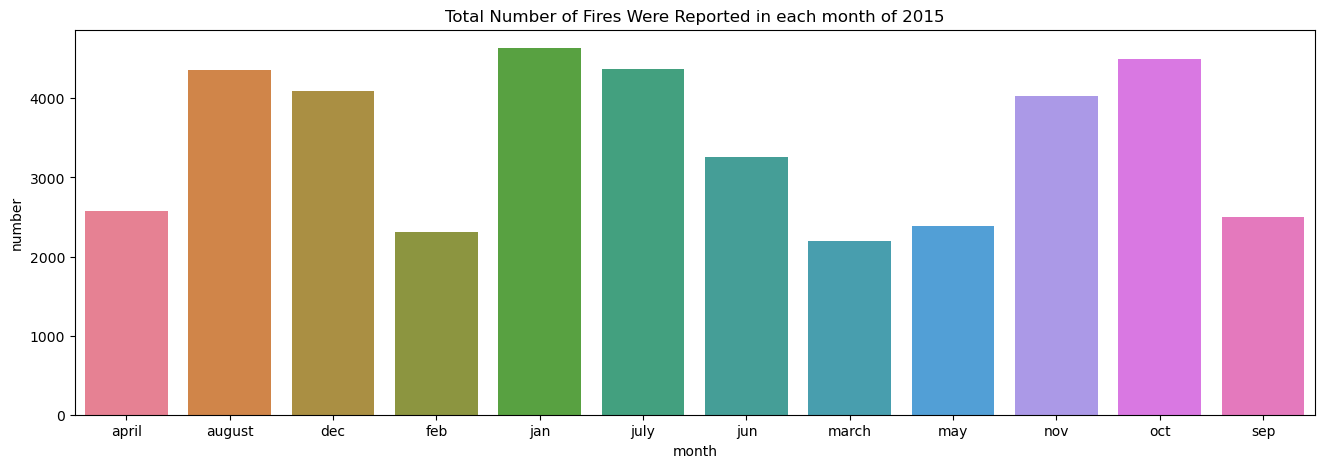

In [106]:
plt.figure(figsize=(16,5))
sns.barplot(x='month',y='number',data=data, hue='month')
plt.title("Total Number of Fires Were Reported in each month of 2015")

In [101]:
data=df.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()

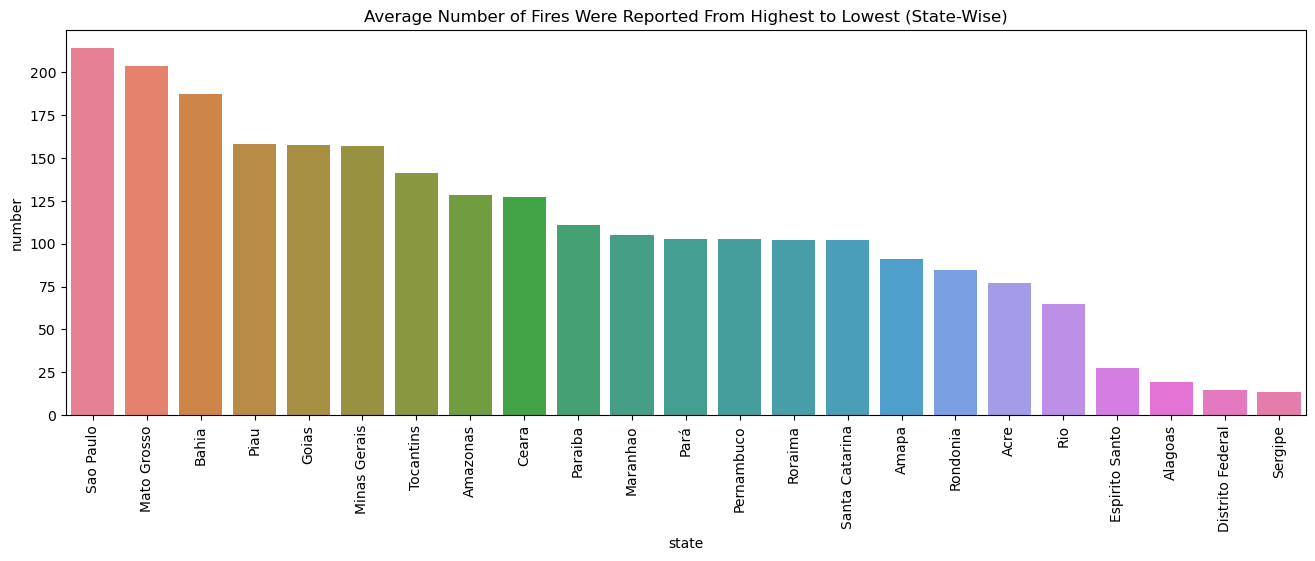

In [103]:
plt.figure(figsize=(16,5))
sns.barplot(x="state",y="number",data=data, hue='state')
plt.title("Average Number of Fires Were Reported From Highest to Lowest (State-Wise)")
plt.xticks(rotation=90)
plt.show()